In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

In [2]:
data_dir = '../data'

bc_yhat_train_path = f'{data_dir}/processed/predictions/jared_train_yhat.csv'
bc_yhat_test_path = f'{data_dir}/processed/predictions/jared_test_yhat.csv'
y_train_path = f'{data_dir}/processed/Ytrain.csv'
y_test_path = f'{data_dir}/processed/Ytest.csv'

bc_yhat_train = pd.read_csv(bc_yhat_train_path)
bc_yhat_test = pd.read_csv(bc_yhat_test_path)
Ytrain =pd.read_csv(y_train_path)['dangerous'].values
Ytest =pd.read_csv(y_test_path)['dangerous'].values

In [3]:
from sklearn.metrics import precision_recall_curve, auc

def plot_pr_curve_dev(y_true, y_pred, labels=None,
                  figsize=(10,6), dpi=90, savefig=False, figname=None, figdir=None):
    """Generates precisio-recall curve plot for single or multiple models

    Args:
        y_true: Ground truth outcomes for dangerous/not dangerous
        y_pred: Either a list of model prediction probabilities or 
                a single model outcomes
        labels: Labels to include if y_pred is a list
        dpi: matplotlib dpi
        figsize: Follows matplotlib fig size convention of (h, w)
        savefig: Boolean indicating whether to save figure
        figname: Figure title
        figdir: Directory to save figure.

    Returns:
        None
    """
    fig = plt.figure(figsize=figsize, dpi=dpi)

    # Handle non-list instances of the predictions
    if not isinstance(y_pred, list):
        y_pred = [y_pred]

    prec_list = []
    recall_list = []
    auc_list = []
    
    for mod in y_pred:
        mod = np.array(mod).reshape(-1)
        prec_i, recall_i, thres_i = precision_recall_curve(y_true, mod)
        prec_list.append(prec_i)
        recall_list.append(recall_i)
        
        auc_i = auc(recall_i, prec_i)
        auc_list.append(auc_i)

    if labels == None:
        labels = [f'Precision-recall {i}' for i in range(len(prec_list))]
    cmap = cm.get_cmap('Dark2').colors
    
    for prec_, recall_, auc_, label_, color_ in zip(prec_list, recall_list, auc_list, labels, cmap):
        label_ = label_ + f' AUC:{auc_:.2f}'
        plt.plot(recall_, prec_, label=label_, color=color_)
    
    plt.title('Precision-Recall curve for lead predictions')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    if savefig == True:
        plt.savefig(figdir + figname)
    else:
        plt.show()

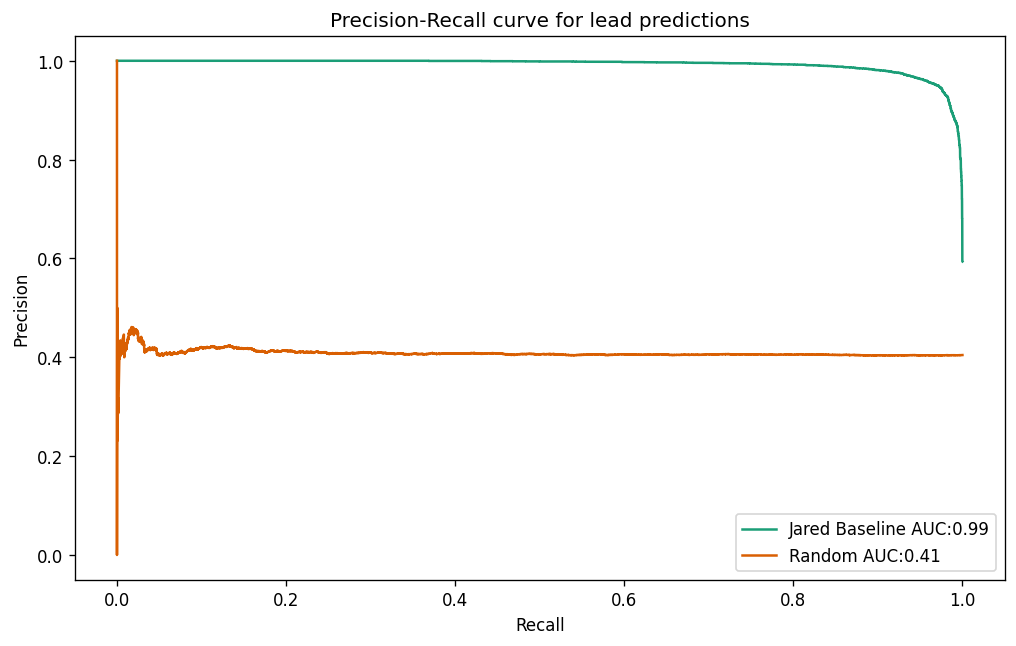

In [4]:
N = len(bc_yhat_train)
y_hat_random = [np.random.rand(N)]
mod_list = [bc_yhat_train.values[:,1], y_hat_random]
labels = ['Jared Baseline', 'Random']

plot_pr_curve_dev(Ytrain, mod_list, labels=labels, dpi=120, savefig=True, figdir='./', figname='pr.png')

## Usage sample

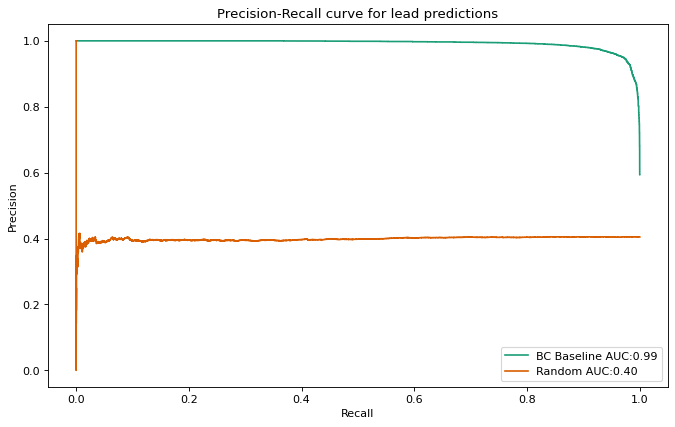

In [5]:
import numpy as np
import pandas as pd

from blue_conduit_spatial.evaluation import plot_pr_curve

data_dir = '../data'
y_train_path = f'{data_dir}/processed/Ytrain.csv'
bc_yhat_train_path = f'{data_dir}/processed/predictions/jared_train_yhat.csv'

y_train = pd.read_csv(y_train_path)['dangerous'].values
y_hat_train = pd.read_csv(bc_yhat_train_path).values[:,1]
y_hat_random = [np.random.rand(len(y_train))]

mod_list = [y_hat_train, y_hat_random]
labels = ['BC Baseline', 'Random']

plot_pr_curve(y_train, mod_list, labels=labels, dpi=80, savefig=True, figdir='./', figname='pr.png')